# Objectives of this program
- To explore the factors that can improve the **Growth Rate (%)** of a Startup business
- To explore the relationship between the factors that can increase the **Growth Rate** of a startup
- To create a machine learning model that can predict the **Growth Rate** of a startup based off of those factors
- To provide solutions to make a successful startup

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Exploratory Data Analysis
Loading the dataset

In [2]:
file_path = "startup_growth_investment_data.csv"
df = pd.read_csv(file_path)

# Remove extra white space from columns
df.columns = df.columns.str.strip()

# Drop the useless column
df = df.drop("Startup Name", axis=1)

In [3]:
# Display the first 5 rows of data
df.head()

,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Industry                 5000 non-null   object 
 1   Funding Rounds           5000 non-null   int64  
 2   Investment Amount (USD)  5000 non-null   float64
 3   Valuation (USD)          5000 non-null   float64
 4   Number of Investors      5000 non-null   int64  
 5   Country                  5000 non-null   object 
 6   Year Founded             5000 non-null   int64  
 7   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 312.6+ KB


In [5]:
# Statistical Summary
df.describe()

,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Year Founded,Growth Rate (%)
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.491600,2.455567e+09,7.971059e+09,25.542000,2011.544000,102.091732
std,2.913353,1.423787e+09,5.479487e+09,14.271838,6.885285,56.179781
min,1.000000,1.102610e+06,1.722547e+06,1.000000,2000.000000,5.060000
25%,3.000000,1.221506e+09,3.598305e+09,13.000000,2006.000000,52.815000
50%,6.000000,2.460634e+09,7.002304e+09,25.000000,2012.000000,102.215000
75%,8.000000,3.639951e+09,1.147676e+10,38.000000,2018.000000,150.580000
max,10.000000,4.999544e+09,2.470906e+10,50.000000,2023.000000,199.970000


In [6]:
# Checking column names
df.columns

Index(['Industry', 'Funding Rounds', 'Investment Amount (USD)',
       'Valuation (USD)', 'Number of Investors', 'Country', 'Year Founded',
       'Growth Rate (%)'],
      dtype='object')

In [7]:
# Checking data types
df.dtypes

Industry                    object
Funding Rounds               int64
Investment Amount (USD)    float64
Valuation (USD)            float64
Number of Investors          int64
Country                     object
Year Founded                 int64
Growth Rate (%)            float64
dtype: object

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Industry                   0
Funding Rounds             0
Investment Amount (USD)    0
Valuation (USD)            0
Number of Investors        0
Country                    0
Year Founded               0
Growth Rate (%)            0
dtype: int64

In [9]:
# Checking for duplicated values
duplicated_values = df.duplicated().sum()
duplicated_values

0

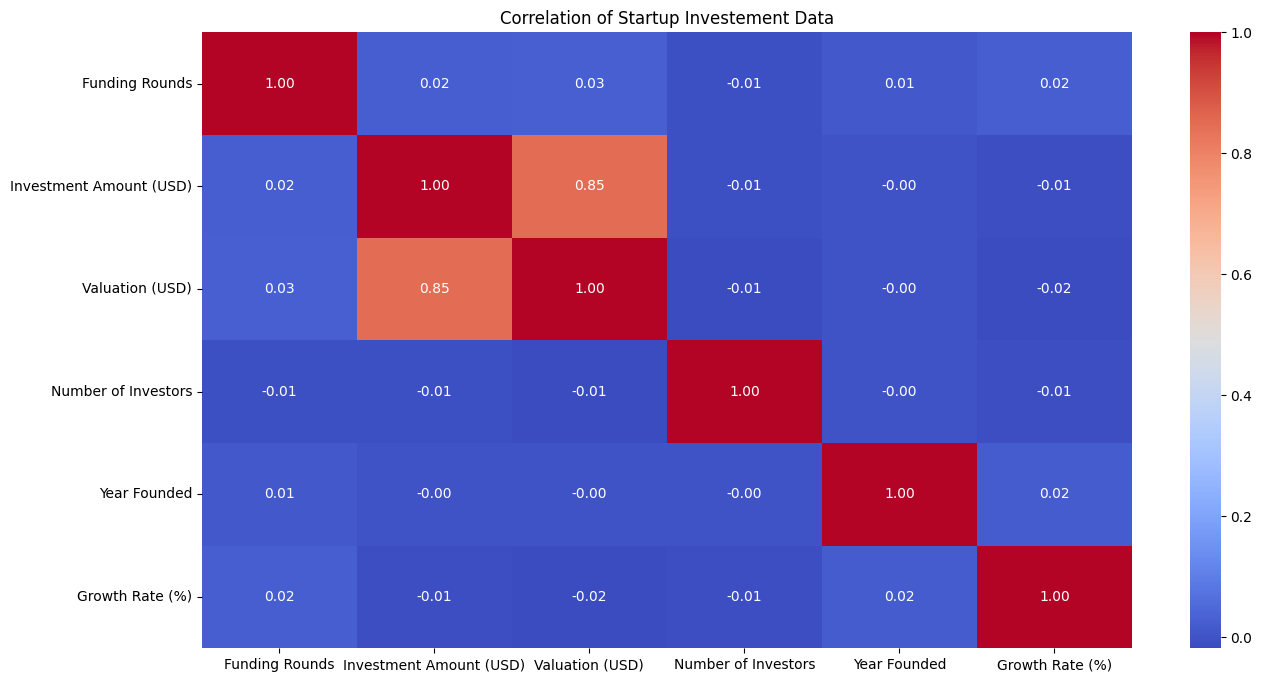

In [10]:
numerical_df = df.select_dtypes(include=["int64", "float64"])

# Compute and show the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation of Startup Investement Data")
plt.show()

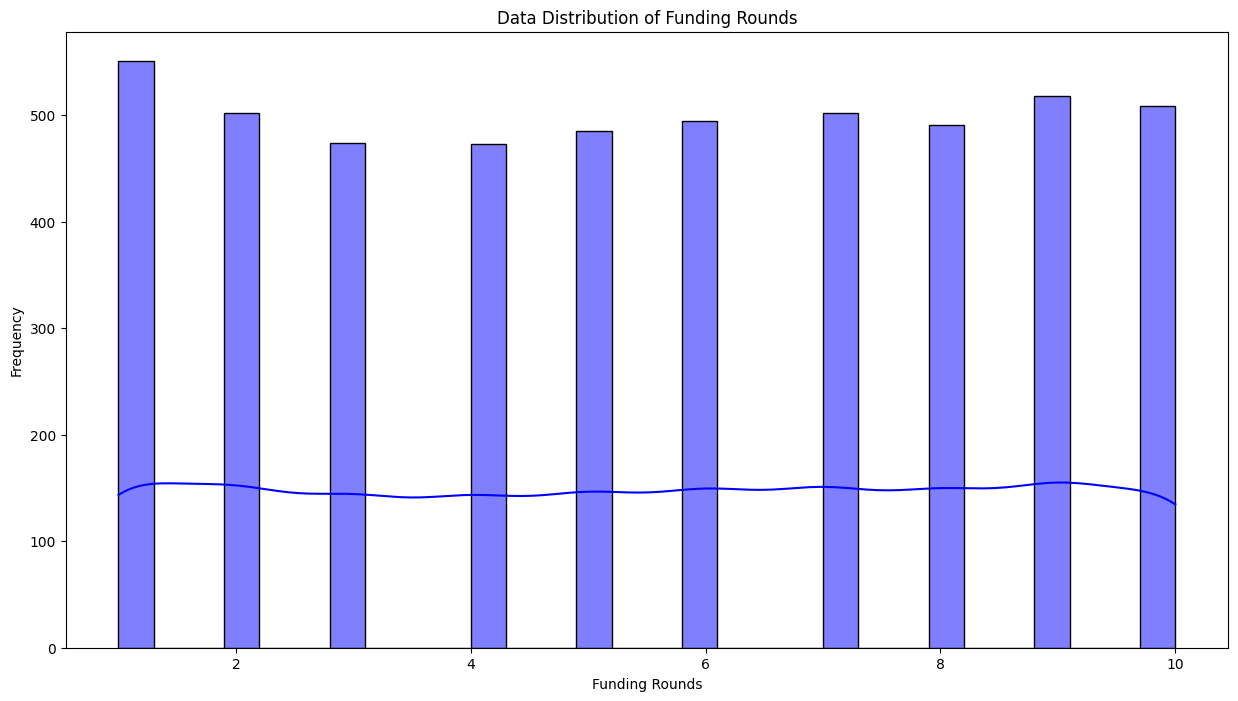

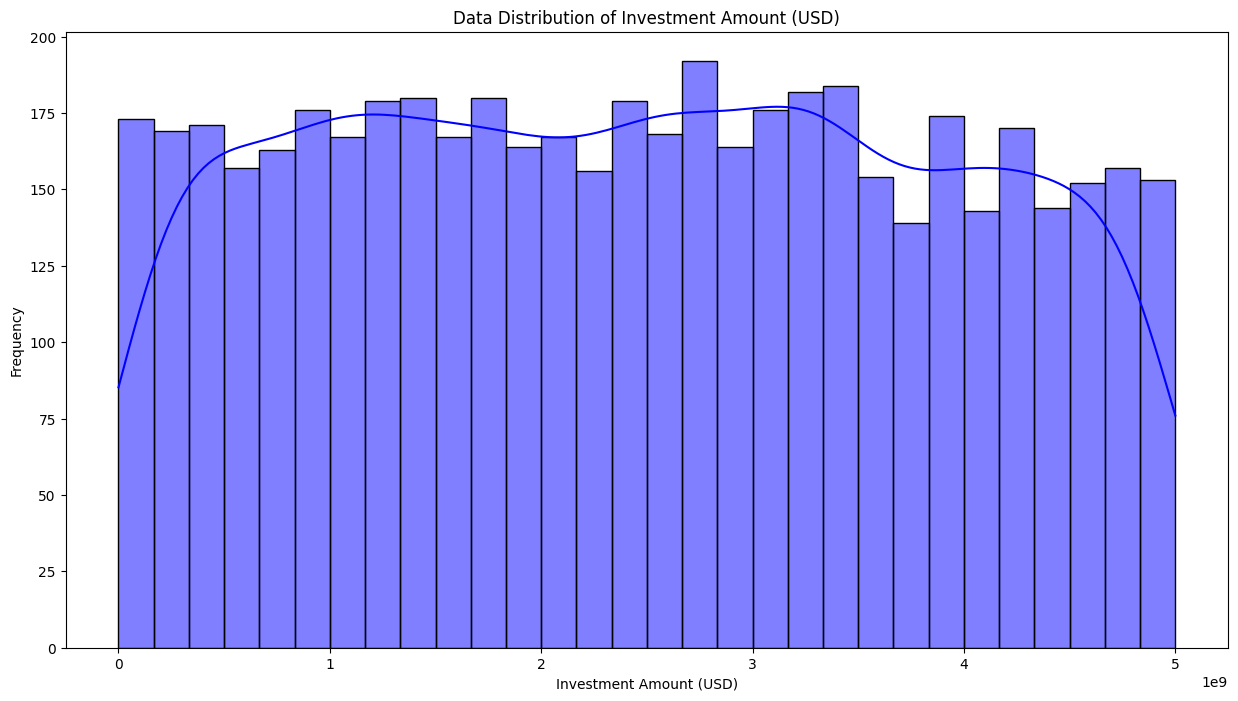

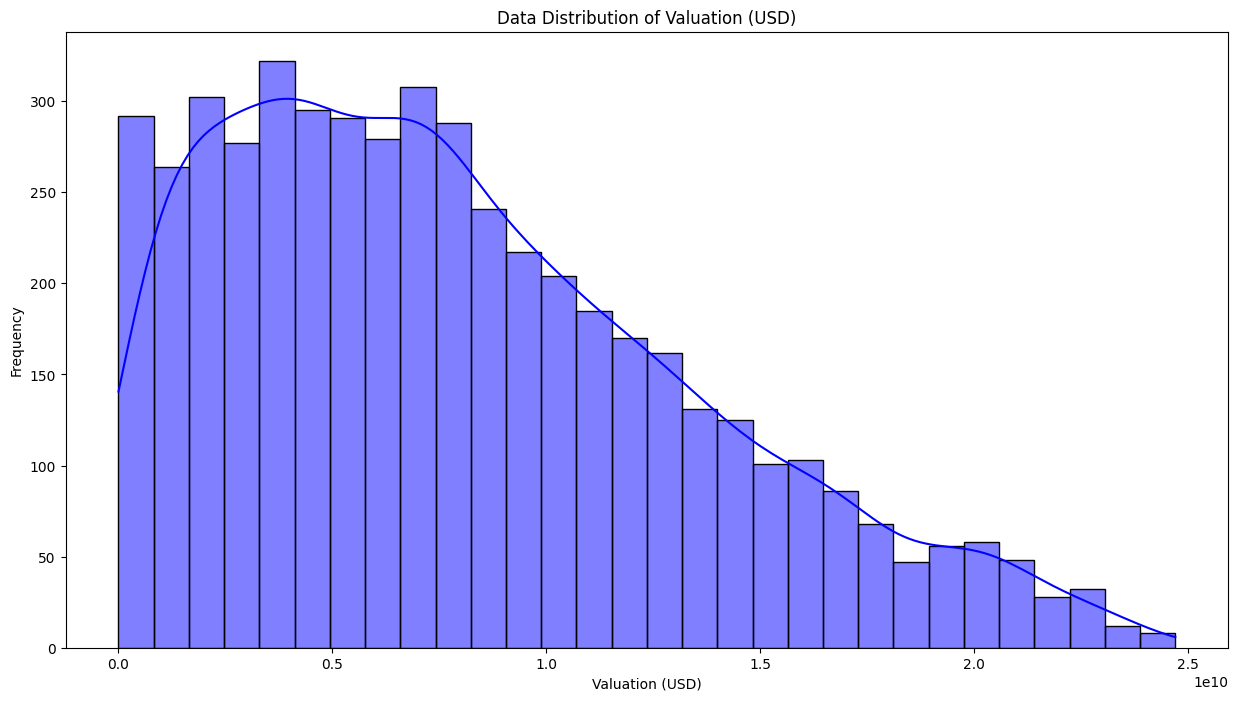

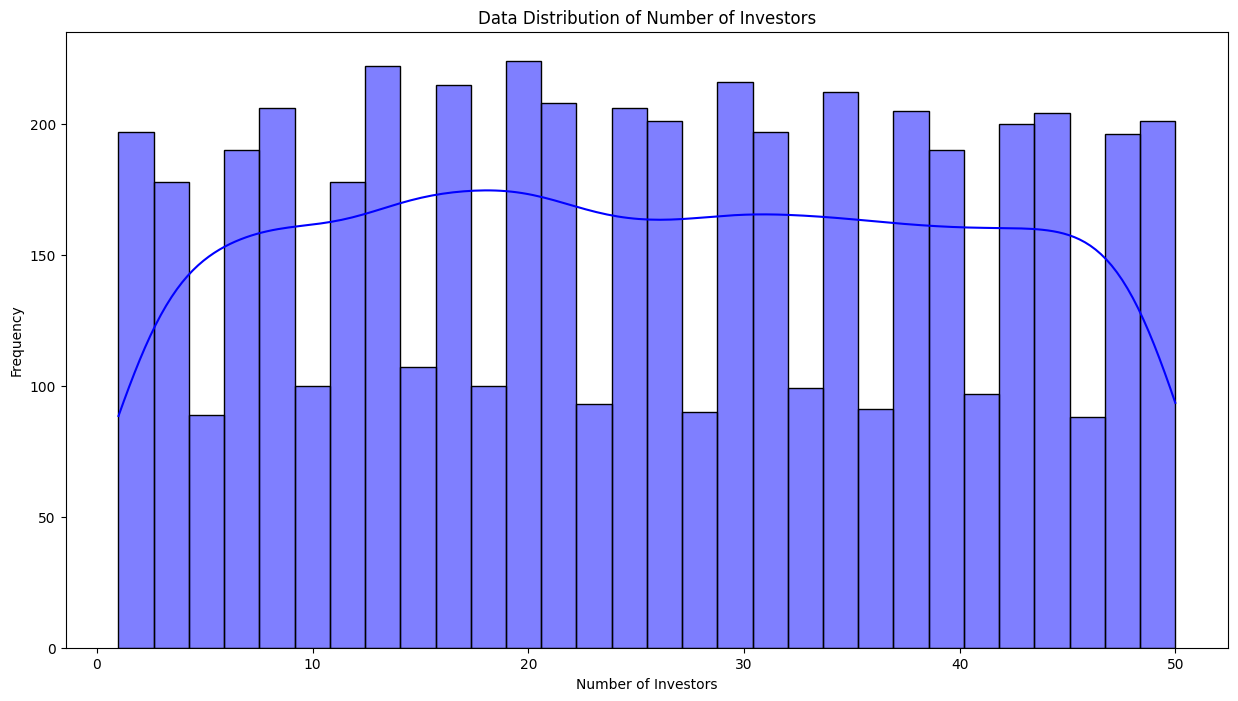

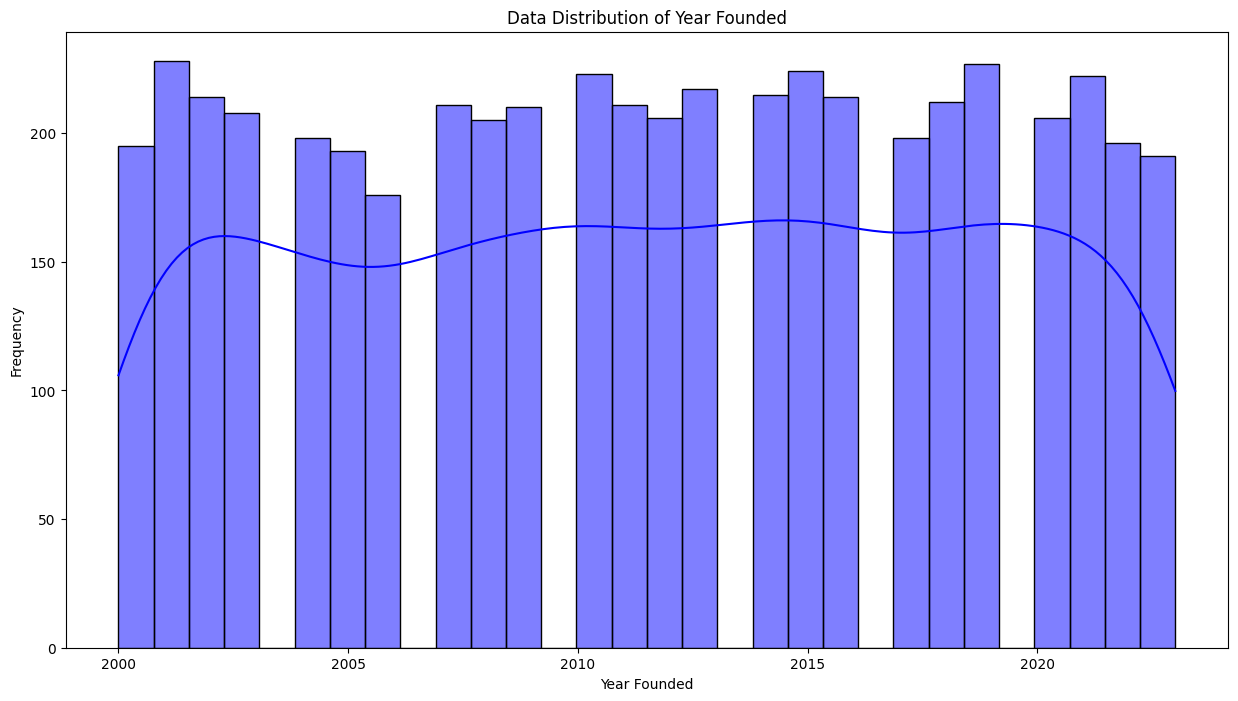

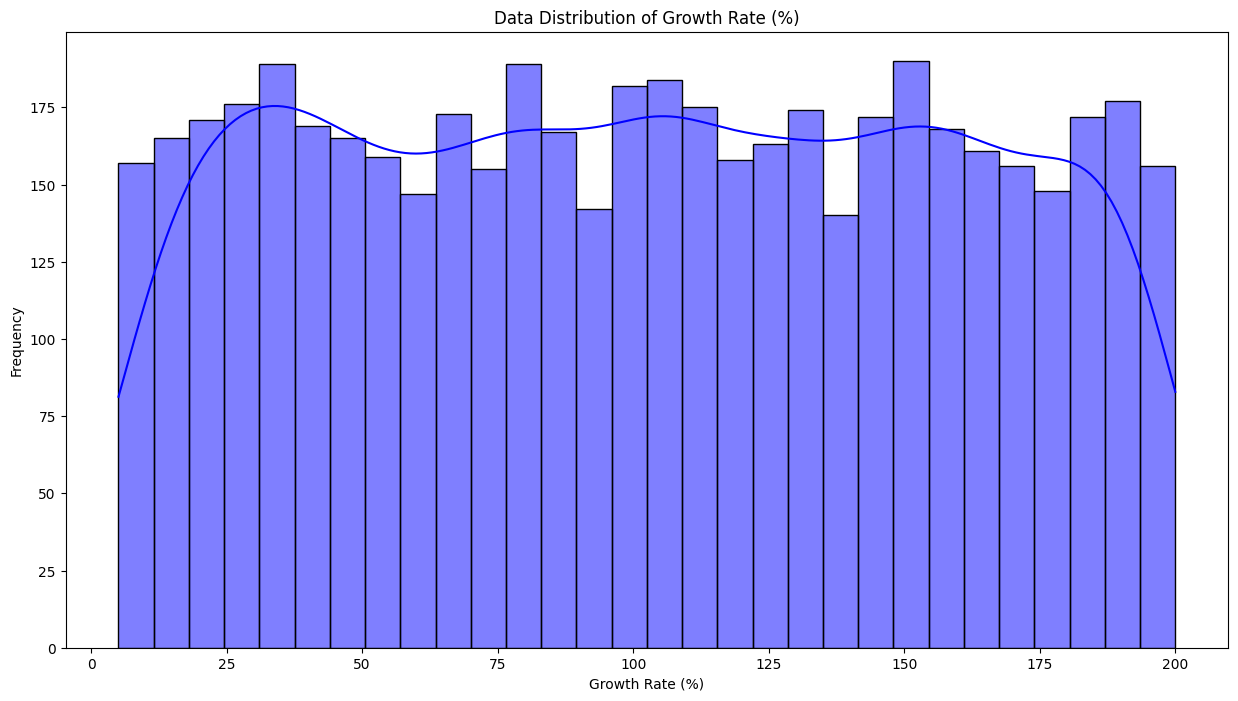

In [11]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(15, 8))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f"Data Distribution of {col}")
    plt.ylabel("Frequency")
    plt.xlabel(col)
    plt.show()

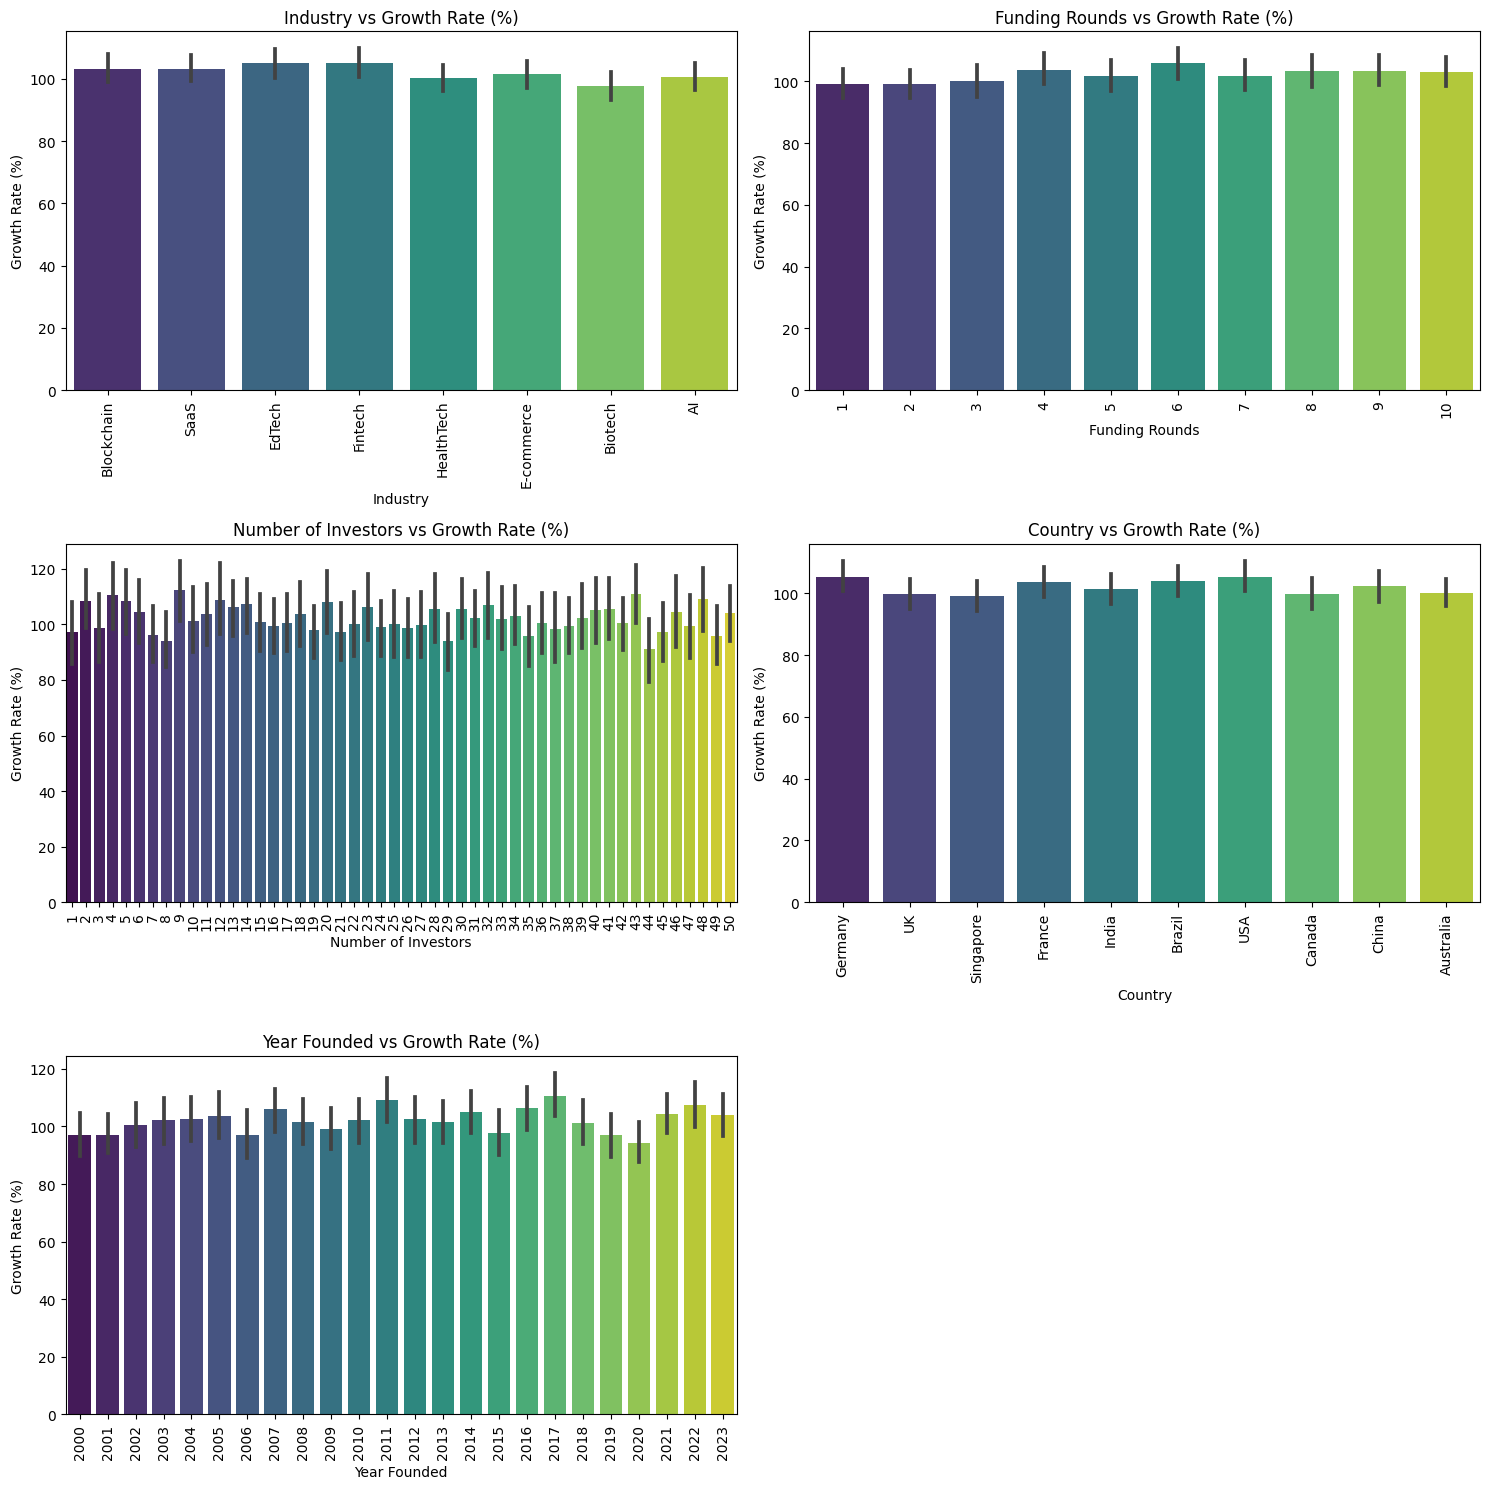

In [12]:
# Select numerical columns (excluding the target variable)
df_categorical = df.select_dtypes(include=['object', 'int64']).drop(columns=['Growth Rate (%)'], errors='ignore')

# Get the number of numerical columns
col_count = len(df_categorical.columns)
nrows = (col_count + 1) // 2  # Ensure enough rows for subplots
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten() if col_count > 1 else [axes]

# Plot each numerical variable against Early_Prediction
for i, column in enumerate(df_categorical.columns):
    sns.barplot(x=df[column], y=df['Growth Rate (%)'], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{column} vs Growth Rate (%)')
    axes[i].tick_params(axis='x', rotation=90)

# Remove unused subplots if the number of numerical columns is odd
if col_count % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

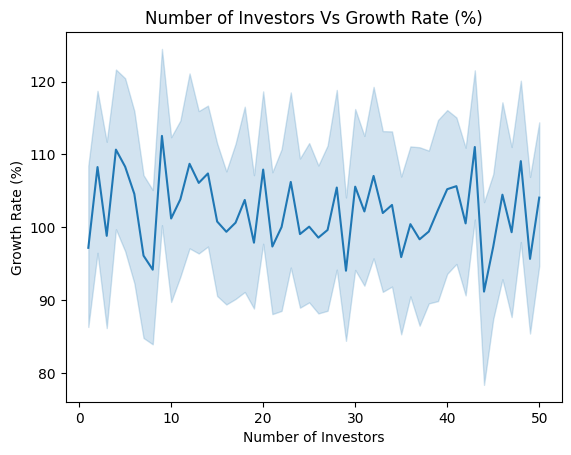

In [13]:
sns.lineplot(x="Number of Investors", y="Growth Rate (%)", data=df)
plt.title("Number of Investors Vs Growth Rate (%)")
plt.show()

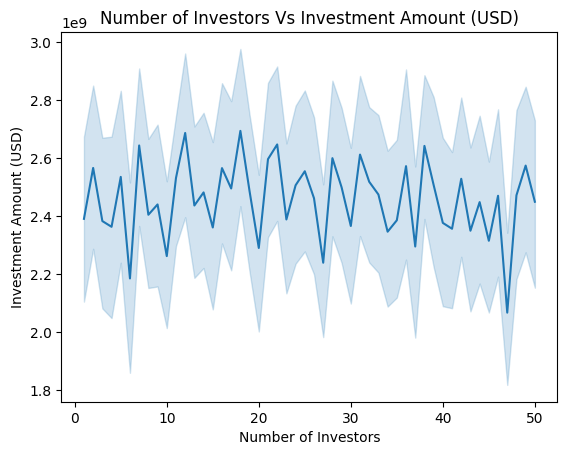

In [14]:
sns.lineplot(x="Number of Investors", y="Investment Amount (USD)", data=df)
plt.title("Number of Investors Vs Investment Amount (USD)")
plt.show()

# Machine Learning

Preprocessing Data

In [15]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
df_categorical = df.select_dtypes(include='object')

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in df_categorical.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])  # Transform the categorical column
    label_encoders[column] = le  # Store the encoder for future inverse transformation if needed

# Check the transformed dataframe
print(df.head())

   Industry  Funding Rounds  Investment Amount (USD)  Valuation (USD)  \
0         2               8             1.335166e+09     6.621448e+09   
1         7               2             2.781498e+09     8.363214e+09   
2         4              10             3.309032e+09     1.548270e+10   
3         5               5             4.050196e+09     1.268253e+10   
4         4               9             1.645080e+09     6.887966e+09   

   Number of Investors  Country  Year Founded  Growth Rate (%)  
0                   50        5          2012            77.10  
1                   36        8          2006           105.52  
2                   39        7          2016           190.47  
3                   44        4          2021             9.44  
4                   48        6          2011           192.00  


Loading the training and testing data

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop("Growth Rate (%)", axis=1)
Y = np.log1p(df["Growth Rate (%)"])

# Scale Fit Transformation
X_scaled = StandardScaler().fit_transform(X)

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Setting up and training the best model

In [18]:
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# Split dataset into training and testing (assuming X_scaled and Y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grids = {
    "Linear Regression": {
         "fit_intercept": [True, False]
    },
    "Ridge Regression": {
         "alpha": [0.1, 1, 10, 50, 100]
    },
    "Lasso Regression": {
         "alpha": [0.001, 0.01, 0.1, 1, 10]
    },
    "ElasticNet Regression": {
         "alpha": [0.001, 0.01, 0.1, 1, 10],
         "l1_ratio": [0.1, 0.5, 0.9]
    },
    "Decision Tree": {
         "max_depth": [None, 5, 10, 20],
         "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
         "n_estimators": [100, 200],
         "max_depth": [None, 5, 10],
         "min_samples_split": [2, 5]
    },
    "Gradient Boosting": {
         "n_estimators": [100, 200],
         "learning_rate": [0.01, 0.1, 0.2],
         "max_depth": [3, 5, 7]
    },
    "AdaBoost": {
         "n_estimators": [50, 100, 200],
         "learning_rate": [0.01, 0.1, 1]
    },
    "Support Vector Machine": {
         "C": [0.1, 1, 10],
         "epsilon": [0.01, 0.1, 0.2],
         "kernel": ['rbf']
    }
}

# Define base models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet Regression": ElasticNet(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Support Vector Machine": SVR()
}

best_model = None
best_r2 = float('-inf')
results = []

# Tune hyperparameters for each model using GridSearchCV
for name, model in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grid=param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_estimator = grid.best_estimator_
    predictions = best_estimator.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    results.append((name, r2, mse, mae, grid.best_params_))
    
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"R² Score: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}\n")
    
    # Track the best model by R² score
    if r2 > best_r2:
        best_r2 = r2
        best_model = (name, best_estimator)

# Print a summary of model performances
print("\nModel Performance Comparison:")
print("=" * 40)
for name, r2, mse, mae, best_params in results:
    print(f"{name}:")
    print(f"   R² Score: {r2:.4f}")
    print(f"   Mean Squared Error: {mse:.4f}")
    print(f"   Mean Absolute Error: {mae:.4f}")
    print(f"   Best Params: {best_params}")
    print("-" * 40)

# Save the best model to disk
best_model_name, best_model_instance = best_model
joblib.dump(best_model_instance, "growth_rate_startup_prediction_model.pkl")
print(f"\n🏆 Best Model: {best_model_name} with R² Score: {best_r2:.4f} (Saved as 'best_model.pkl')")


Tuning Linear Regression...
Best params for Linear Regression: {'fit_intercept': True}
R² Score: -0.0024, MSE: 0.5955, MAE: 0.6275

Tuning Ridge Regression...
Best params for Ridge Regression: {'alpha': 100}
R² Score: -0.0021, MSE: 0.5954, MAE: 0.6274

Tuning Lasso Regression...
Best params for Lasso Regression: {'alpha': 0.1}
R² Score: -0.0007, MSE: 0.5945, MAE: 0.6269

Tuning ElasticNet Regression...
Best params for ElasticNet Regression: {'alpha': 0.1, 'l1_ratio': 0.5}
R² Score: -0.0007, MSE: 0.5945, MAE: 0.6269

Tuning Decision Tree...
Best params for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
R² Score: -0.0093, MSE: 0.5996, MAE: 0.6283

Tuning Random Forest...
Best params for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
R² Score: -0.0059, MSE: 0.5976, MAE: 0.6282

Tuning Gradient Boosting...
Best params for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
R² Score: 0.0004, MSE: 0.5939, MAE: 0.6259

Tuning 

# Conclusion
- There is a very strong positive relationship between the valueation of a startup and the total investment put into that startup, indicating that the ammount a startup is valued at is correlates highly with the total investment put into it.
- The Industry with the highest growth rate is **EdTech**
- The Funding rounds with the highest average **Growth Rate** is **6**
- The Countries with the highest Growth Rate is **Germany and USA**
- The Average Growth Rate according to the dataset is **102.1%**
- There is little to no relationship between the **Growth Rate** of a startup and all the other factors in the dataset like the number of investors, the year the business was founded, the total investment amount or the business' valuation.
- The Gradient Boosting model performed moderately okay, with an R² Score of **0.0004**. 

**Ways to increase Growth Rate may include**
- Product Diversification – Expand your offerings to attract more customers and reduce reliance on a single revenue source.
- Market Expansion – Enter new regions or target different demographics to increase your customer base.
- Strategic Acquisitions – Acquire other businesses to gain new markets, technologies, and competitive advantages.